In [1]:
import yfinance as yf
import pandas as pd
from Options.blackScholes import *
from Options.optionsdata import OptionsData
from Options.asianOption import AsianOption
from Options.barrierOption import BarrierOption
from Options.callOption import CallOption
from Options.putOption import PutOption
from Options.optionGreekPlotter import OptionGreekPlotter


Nous allons initialiser la classe `OptionsData` pour le ticker Apple (AAPL).


Data loaded successfully!


d:\deb\ENSAI\cours3A\11. ASSET MANAGEMENT\LAB\Script\Options\blackScholes.py:21: RuntimeWarning: invalid value encountered in sqrt
  d1 = (np.log(stock / strike) + (interest_rate + 0.5 * sigma**2) * maturity) / (sigma * np.sqrt(maturity))
d:\deb\ENSAI\cours3A\11. ASSET MANAGEMENT\LAB\Script\Options\blackScholes.py:22: RuntimeWarning: invalid value encountered in sqrt
  d2 = d1 - sigma * np.sqrt(maturity)
d:\deb\ENSAI\cours3A\11. ASSET MANAGEMENT\LAB\Script\Options\optionsdata.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  call_data["implied_volatility"] = call_data.apply(
d:\deb\ENSAI\cours3A\11. ASSET MANAGEMENT\LAB\Script\Options\blackScholes.py:43: RuntimeWarning: invalid value encountered in sqrt
  d1 = (np.log(stock / strike) + (intere

Prix actuel de l'action AAPL : $236.00


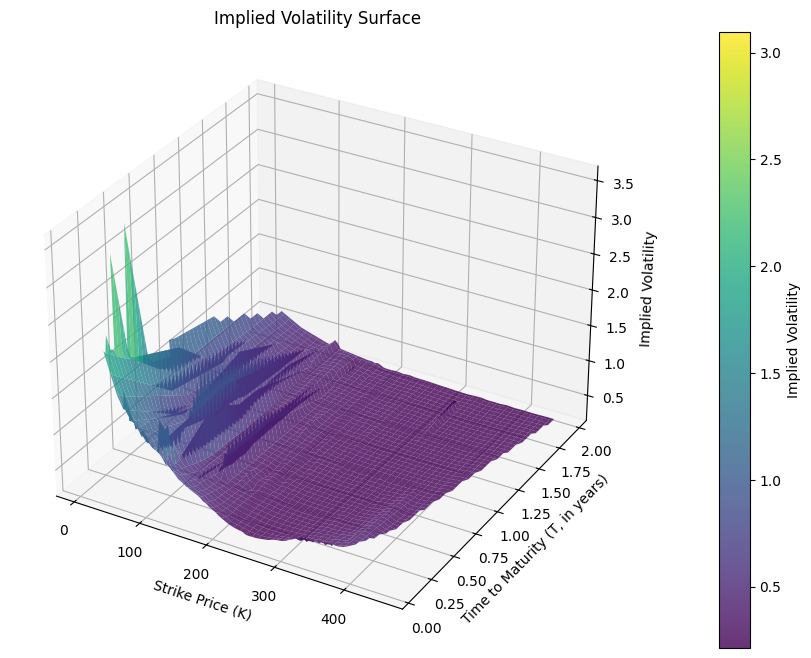

In [2]:
# Initialisation de la classe avec le ticker AMZN
options_data = OptionsData("AAPL")
options_data.load_data()
options_data.process_data()
stock_price = options_data.get_stock_price()
print(f"Prix actuel de l'action AAPL : ${stock_price:.2f}")
# Afficher la surface de volatilité implicite
options_data.implied_volatility_plot()

# Options européennes 

Nous pouvons maintenant pricer une option, avec des valeurs de K (le strike) et de T (la maturité) que l'utilisateur peut modifier : 
Dans un premier temps, nous récupérons la volatilité implicite à l'aide de K et T. 
Nous pouvons ensuite pricer les options européennes (un call ici)

In [3]:
T = 1
K= 180
sigma = options_data.sigma_sim(T, K)
interest_rate = 0.042

call_option = CallOption(K, T, stock_price, interest_rate, sigma)

call_option.option_price()
print(call_option.price)


68.00056561348666


pour un put : 

In [4]:
put_option = PutOption(K, T, stock_price, interest_rate, sigma)

put_option.option_price()
print(put_option.price)

4.597126116533886


# Les Grecques

Nous allons à présent calculer les grecques, ainsi que les afficher. 

In [6]:
# Example of usage
if __name__ == "__main__":
    # Define option parameters
    K = 200
    T = 1.5
    sigma = options_data.sigma_sim(T, K) # Interpolating implied vol
    interest_rate = 0.042

    # Create the plotter instance
    plotter = OptionGreekPlotter(K, T, stock_price, sigma, interest_rate)

    # Functions for each Greek
    def delta(option):
        return option.delta()

    def gamma(option):
        return option.gamma()

    def theta(option):
        return option.theta()

    def vega(option):
        return option.vega()

    def rho(option):
        return option.rho()

    # Plot Delta vs Strikes
    strikes = np.linspace(10, 350, 1000)
    plotter.plot_greek(delta, strikes, "Strike", "Delta", "Delta for Call and Put Options")

    # Plot Gamma vs Strikes
    plotter.plot_greek(gamma, strikes, "Strike", "Gamma", "Gamma for Call and Put Options")

    # Plot Theta vs Maturities
    maturities = np.linspace(0.1, 5, 100)
    plotter.plot_greek(theta, maturities, "Maturity (T)", "Theta", "Theta for Call and Put Options")

    # Plot Vega vs Strikes
    plotter.plot_greek(vega, strikes, "Strike", "Vega", "Vega for Call and Put Options")

    # Plot Rho vs Strikes
    plotter.plot_greek(rho, strikes, "Strike", "Rho", "Rho for Call and Put Options")

# Options asiatiques

Nous allons à présent étudier les options asiatiques. 
Pour une option asiatique, le payoff dépend de la moyenne du prix de l'actif sous-jacent sur une période donnée, plutôt que du prix à la maturité (option classique).

On l'utilise pour plusieurs raisons :

* Réduction de la volatilité :

Les options asiatiques sont moins sensibles à la volatilité extrême ou aux pics de prix inhabituels à un moment donné.
En utilisant une moyenne des prix, elles "lissent" les fluctuations du sous-jacent.

* Protection contre les manipulations de prix :

Pour certaines options classiques, le prix à la maturité peut être manipulé sur des marchés peu liquides. En utilisant une moyenne, l'option asiatique réduit ce risque.
* Coût généralement plus faible :

Les options asiatiques sont souvent moins chères que les options classiques, car elles réduisent les risques associés aux variations extrêmes de prix.
Utilité pour les entreprises et les matières premières :

Très utilisées pour les matières premières ou les devises, où les prix peuvent fluctuer considérablement au cours du temps.
Par exemple, une entreprise peut utiliser une option asiatique pour se protéger contre une hausse moyenne du prix du pétrole pendant une période donnée.

Dans le code suivant, nous pouvons également définir le strike, la maturité ainsi que la période sur laquelle nous voulons faire la moyenne. 

Averaging start time: 0.7063 (en années)


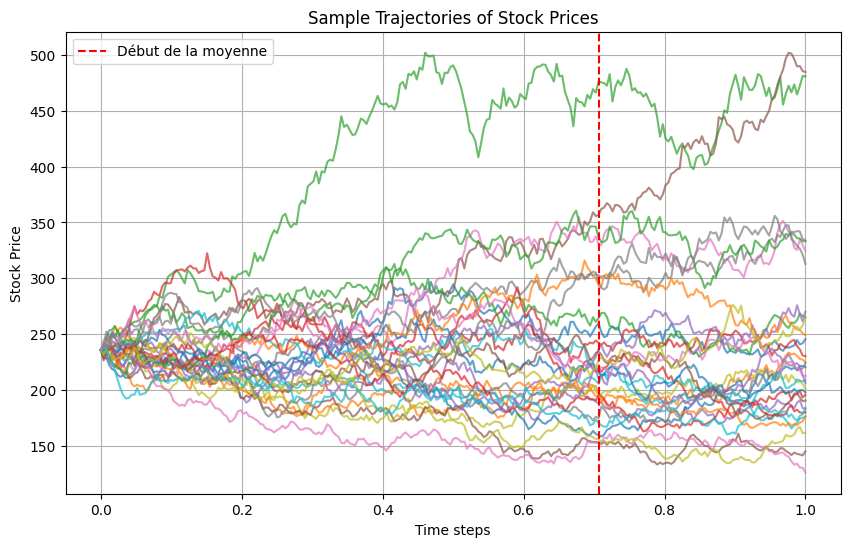

Asian Call Price: 49.2640
Asian Put Price: 6.3408


In [7]:
# Define option parameters
K = 200  # prix du strike
T = 1  # Maturité (en année)
sigma = options_data.sigma_sim(T, K)
interest_rate = 0.042  #taux d'intérêt sans risque

# Simulation parameters
n_simulations = 10000 
n_steps = 252  
averaging_period = 0.3  

asian_option = AsianOption()

# nous priçons le call et le put asiatique
call_price, put_price = asian_option.price_asian_option(
        initial_price=stock_price,
        strike=K,
        maturity=T,
        interest_rate=interest_rate,
        volatility=sigma,
        n_simulations=n_simulations,
        n_steps=n_steps,
        averaging_period=averaging_period,
        show_trajectories=30 
)

# Output the results
print(f"Asian Call Price: {call_price:.4f}")
print(f"Asian Put Price: {put_price:.4f}")

Nous pouvons également analyser la probabilité que le call soit nul; de même pour le put. 
Nous affichons également les densités des payoff des call ainsi que des put.

Probability that Call Payoff is 0: 0.2456


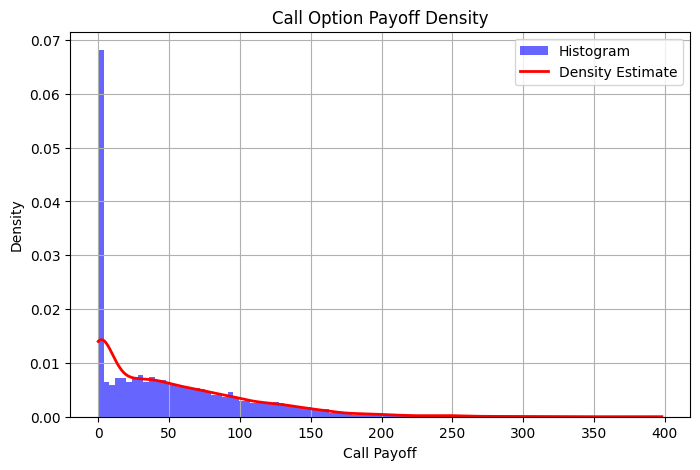

Probability that Put Payoff is 0: 0.7544


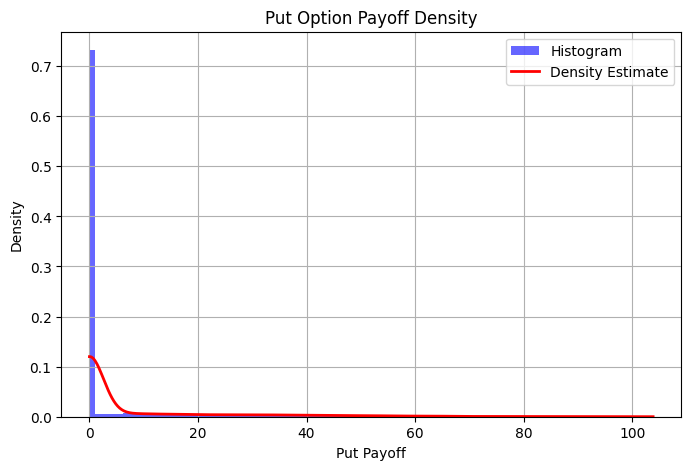

In [8]:
# Calculate and display probabilities and densities
asian_option.prob_call_zero_and_density()
asian_option.prob_put_zero_and_density()

# Options "barrière"

Les avantages des options barrières sont multiples : 

* Réduction du coût :

Ces options sont moins chères que les options classiques car elles peuvent être désactivées.
Idéal pour les investisseurs qui souhaitent une couverture moins coûteuse mais sont prêts à accepter les conditions associées.
* Adaptées à certaines stratégies :

Si l'on pense que le prix du sous-jacent va rester dans une certaine fourchette, les options barrières permettent de profiter de cette conviction à moindre coût.

* Gestion du risque :

Les barrières permettent de réduire les pertes potentielles en excluant certains scénarios extrêmes.

Dans le code suivant, l'utilisateur peut choisir le type de barrière souhaité (parmi "up-and-out", "up-and-in", "down-and-out", "down-and-in") ainsi que le choix du type d'option à pricer (call ou put). 

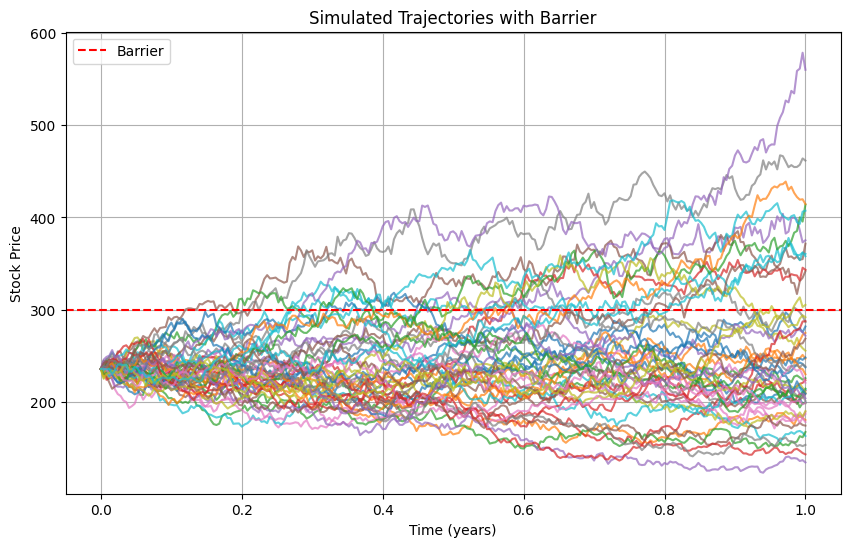

Prix de l'option : 12.3810


In [9]:
K = 200  # Strike
T = 1  # Maturité en années
r = 0.042  # Taux sans risque
sigma = options_data.sigma_sim(T, K)


n_simulations = 10000
n_steps = 250
barrier = 300  # Niveau de la barrière
option_type = 'call'  # type d'option choisie
barrier_type = 'up-and-out'  # type de barrière

option = BarrierOption()

# Afficher les trajectoires
option.plot_trajectories(stock_price, K, T, r, sigma, n_simulations, n_steps, barrier, option_type, barrier_type)

# Calculer le prix de l'option
option_price = option.price_barrier_option(stock_price, K, T, r, sigma, n_simulations, n_steps, barrier, option_type, barrier_type)

print(f"Prix de l'option : {option_price:.4f}")


Nous pouvons également nous intéresser à la densité de probabilité du payoff de l'option choisie, avec le type de barrière choisie. 
Par ailleurs, nous avons calculé la probabilité que l'option choisie soit nulle, ainsi que la cause. Il y en a deux : à cause de la barrière (l'option n'est pas réalisée car le maximum sur une trajectoire a dépassé la barrière dans le cas d'un "up and out" par exemple); dû au fait que le prix du sous-jacent est inférieur au strike (pour un call), supérieur pour un put. 

Probability that the call option is worthless: 0.6400
   - Due to the barrier: 0.3703
   - Due to the underlying price < strike: 0.2697


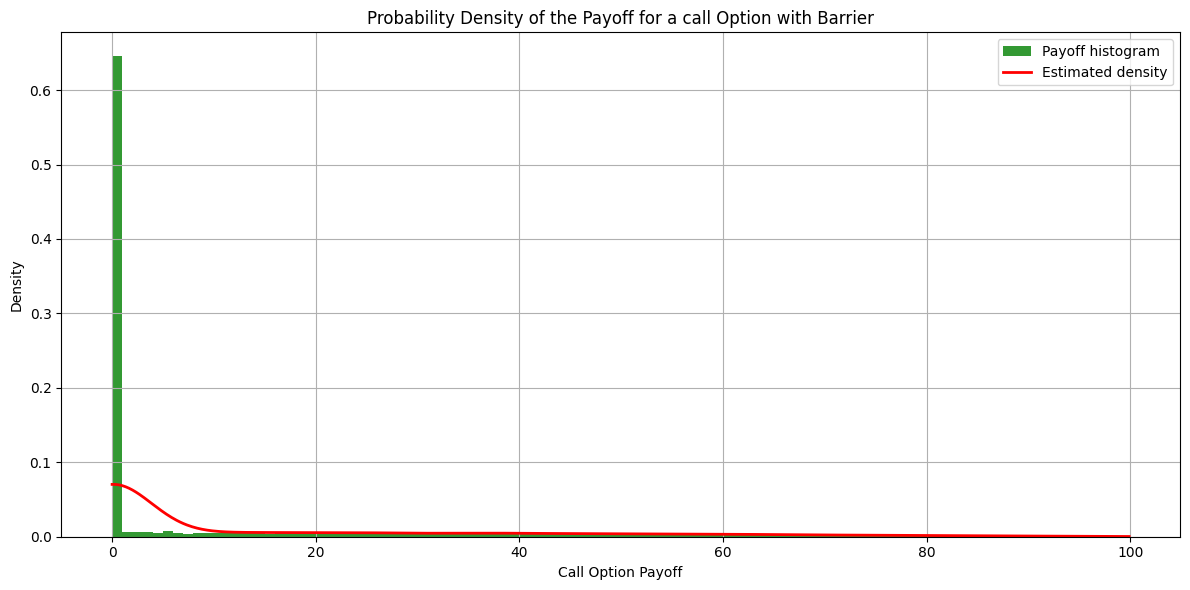

In [10]:
# Afficher la densité et les probabilités
option.plot_density_and_probabilities(stock_price, K, T, r, sigma, n_simulations, n_steps, barrier, option_type, barrier_type)